In [1]:
import yfinance as yf
import yfinance as yf
import pandas as pd
import numpy as np

ativos = ['PETR4.SA','VALE3.SA', 'WEGE3.SA', 
          'RADL3.SA', 'OIBR3.SA','KNRI11.SA',
          'SMAL11.SA','AAPL34.SA','IVVB11.SA']
inicio = '2020-05-01'
fim = '2021-08-24'

precos = pd.DataFrame()
for i in ativos:
  precos[i] = yf.download(i, start = inicio, end = fim)['Adj Close']
precos.tail(5)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA
Date,,,,,,,,,
2021-08-17,24.061735,96.931068,34.640785,25.219419,1.02,132.929993,130.100006,79.107857,254.550003
2021-08-18,23.848091,93.678902,33.532364,25.120132,1.01,132.970001,130.270004,78.918121,256.500000
2021-08-19,23.714561,88.334099,35.140079,26.033590,1.02,131.300003,133.500000,79.567207,260.390015
2021-08-20,23.678955,88.370338,35.928959,26.480392,1.04,133.289993,135.910004,79.726974,259.790009
2021-08-23,24.052834,87.147369,35.699284,26.311602,1.15,139.240005,135.899994,80.595749,263.089996


 # Simulação de uma carteira vs. IBOV

In [2]:
compras = {'PETR4.SA': 1000, 'VALE3.SA': 700, 'WEGE3.SA': 1500, 
           'RADL3.SA': 700, 'OIBR3.SA': 200, 'KNRI11.SA': 700, 
           'SMAL11.SA': 1500, 'AAPL34.SA': 2000, 'IVVB11.SA': 1500, 
            }
ibov = yf.download('^BVSP', start = inicio, end = fim)
compras_df = pd.Series(data=compras, index=list(compras.keys()))
primeiro = precos.iloc[0]
qtd_acoes = compras_df/primeiro
PL = precos*qtd_acoes
PL['PL Total'] = PL.iloc[:].sum(axis = 1)
PL.head(3)

[*********************100%***********************]  1 of 1 completed


,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,PL Total
Date,,,,,,,,,,
2020-05-04,1000.000000,700.000000,1500.000000,700.000000,200.000000,700.000000,1500.000000,2000.000000,1500.000000,9800.000000
2020-05-05,1032.221011,696.335020,1468.750109,696.987303,205.882347,702.685449,1479.377360,2059.368975,1526.950431,9868.558006
2020-05-06,994.246308,706.373654,1461.973329,693.037439,205.882347,717.231486,1462.333842,2137.167113,1548.315577,9926.561096


In [3]:
primeiro

PETR4.SA      14.126042
VALE3.SA      35.844719
WEGE3.SA      19.620827
RADL3.SA      20.637648
OIBR3.SA       0.680000
KNRI11.SA    156.399994
SMAL11.SA     88.010002
AAPL34.SA     39.927597
IVVB11.SA    169.199997
Name: 2020-05-04 00:00:00, dtype: float64

In [4]:
ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)
ibov = ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1)
ibov.index = pd.to_datetime(ibov.index)
PL.index = pd.to_datetime(PL.index)
novo_df = pd.merge(ibov, PL, how = 'inner', on = 'Date')
PL_normalizado = novo_df/novo_df.iloc[0]
PL_normalizado.head()

,IBOV,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,PL Total
Date,,,,,,,,,,,
2020-05-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-05-05,1.007543,1.032221,0.994764,0.979167,0.995696,1.029412,1.003836,0.986252,1.029684,1.017967,1.006996
2020-05-06,1.002383,0.994246,1.009105,0.974649,0.990053,1.029412,1.024616,0.974889,1.068584,1.032210,1.012914
2020-05-07,0.990403,1.003452,1.048258,0.981175,0.991679,0.985294,1.023018,0.954437,1.100000,1.081560,1.027585
2020-05-08,1.017585,1.063291,1.111996,0.959839,1.001147,1.014706,1.039003,0.955573,1.110054,1.068262,1.037587


<AxesSubplot:xlabel='Date'>

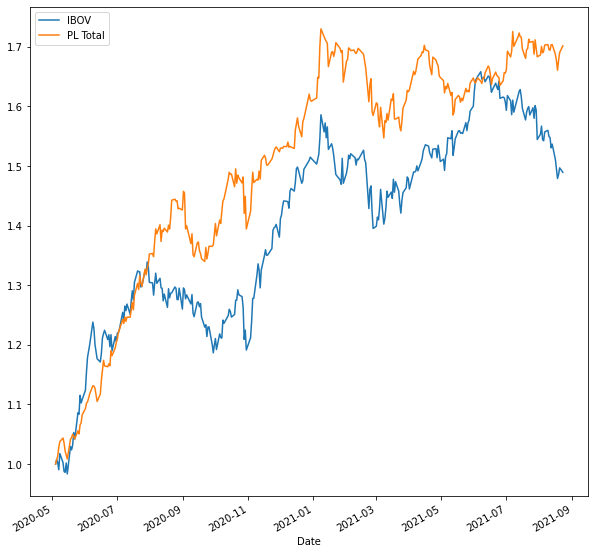

In [5]:
PL_normalizado[['IBOV', 'PL Total']].plot(figsize = (10,10))

In [ ]:
pl_